### 遍历文件，找到值不变的列

In [1]:
import pandas as pd
import os

# 定义文件路径
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 遍历每一列
for col in data.columns:
    # 检查列中是否所有值都相同
    unique_values = data[col].unique()
    if len(unique_values) == 1:
        # 输出列名和该列唯一的数值
        print(f"列 '{col}' 的所有值相同，值为: {unique_values[0]}")


In [3]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 定义要删除的列名列表
columns_to_drop = [
    "ground_heat", "measured_albedo", "surface_temperature(meas)", 
    "24h_wind_drift", "erosion_mass_loss", "virtual_lysimeter_under_the_soil", 
    "temperature@0.25m", "temperature@0.5m", "temperature@1m", 
    "temperature@-0.25m", "temperature@-0.1m", "profile_type", "z_S5"
]

# 删除指定列
data.drop(columns=columns_to_drop, inplace=True)

# 保存修改后的数据回到 CSV 文件
data.to_csv(file_path, index=False)

print("已删除指定的列:", columns_to_drop)


已删除指定的列: ['ground_heat', 'measured_albedo', 'surface_temperature(meas)', '24h_wind_drift', 'erosion_mass_loss', 'virtual_lysimeter_under_the_soil', 'temperature@0.25m', 'temperature@0.5m', 'temperature@1m', 'temperature@-0.25m', 'temperature@-0.1m', 'profile_type', 'z_S5']


### 多少行包含缺失值

In [2]:
import pandas as pd
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'
data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)
rows_with_missing_values = data.isnull().any(axis=1).sum()
print(f"包含缺失值的行数: {rows_with_missing_values}")

包含缺失值的行数: 0


### 哪些列包含缺失值

In [3]:
import pandas as pd
import numpy as np

# 定义文件路径
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'

data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)

columns_with_missing_values = data.columns[data.isnull().any()]

print(f"包含缺失值的列数: {len(columns_with_missing_values)}")
print("包含缺失值的列名:")
for col in columns_with_missing_values:
    print(col)

包含缺失值的列数: 0
包含缺失值的列名:


### 删除包含缺失值的列

In [7]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 定义要删除的列名列表
columns_to_drop = [
    "ground_heat_at_soil_interface",  "stability_index_5"
]

# 删除指定列
data.drop(columns=columns_to_drop, inplace=True)

# 保存修改后的数据回到 CSV 文件
data.to_csv(file_path, index=False)

print("已删除指定的列:", columns_to_drop)


已删除指定的列: ['ground_heat_at_soil_interface', 'stability_index_5']


### 输出文件形状

In [4]:
import pandas as pd
import numpy as np

file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'
data = pd.read_csv(file_path, header=0, sep=',',low_memory=False)
x,y = data.shape
print(f'行数:{x},列数:{y}')

行数:1201,列数:42


### 对数据进行归一化

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 读取原始数据
file_path = '/home/develop/VAE/data/csv/ceshi_temp.csv'
data = pd.read_csv(file_path)

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 对数据进行归一化，忽略非数值列（如果有的话）
# 如果所有列都是数值类型，则可以直接应用于整个 DataFrame
data_normalized = data.copy()  # 创建一个副本，避免修改原始数据

# 对所有列进行归一化，假设数据中没有非数值列
data_normalized.iloc[:, :] = scaler.fit_transform(data_normalized)

# 保存归一化后的数据
output_path = '/home/develop/VAE/data/csv/ceshi_temp_normalized.csv'
data_normalized.to_csv(output_path, index=False)

print(f"归一化后的数据已保存到 {output_path}")


归一化后的数据已保存到 /home/develop/VAE/data/csv/ceshi_temp_normalized.csv


异常数据：(50, 128, 190, 343, 526, 612, 1321, 1652, 1823, 1932, 2024, 2135, 2352, 2683, 2794)

17,43,64,115,176,204,441,551,608,644,675,712,784,895,932

### 将可能得异常点添加到`test.csv`中，并保留原有的index

In [6]:
import pandas as pd

# 读取原始数据
file_path = '/home/develop/VAE/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path)

# 指定需要选择的行的索引（行索引从0开始）
indices = [17, 43, 64, 115, 176, 204, 441, 551, 608, 644, 675, 712, 784, 895, 932]

# 选择指定行
selected_rows = data.iloc[indices].copy()

# 添加 "origin_index" 列
selected_rows['origin_index'] = selected_rows.index

# 保存为新的 CSV 文件
output_path = '/home/develop/VAE/data/csv/test_temp.csv'
selected_rows.to_csv(output_path, index=False)

print(f"选中的行已经保存到 {output_path}")


选中的行已经保存到 /home/develop/VAE/data/csv/test_temp.csv


### 在`ceshi_temp_normalized.csv`中删除对应的列

In [7]:
import pandas as pd

# 读取原始数据
file_path = '/home/develop/VAE/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path)

# 指定需要删除的行的索引（行索引从0开始）
indices = [17, 43, 64, 115, 176, 204, 441, 551, 608, 644, 675, 712, 784, 895, 932]

# 从数据中删除指定的行
data_cleaned = data.drop(indices)

# 保存更新后的 CSV 文件
output_path = '/home/develop/VAE/data/csv/final_temp.csv'
data_cleaned.to_csv(output_path, index=False)

print(f"指定的行已经被移除，更新后的文件保存在 {output_path}")


指定的行已经被移除，更新后的文件保存在 /home/develop/VAE/data/csv/final_temp.csv


In [8]:
import pandas as pd
data = pd.read_csv('/home/develop/VAE/data/csv/final_temp.csv')
x,y=data.shape
print(f"文件行数{x},列数{y}")

文件行数1186,列数42


### 从final_temp.csv文件中随机选取100条数据添加到test_temp.csv中

In [9]:
import pandas as pd
import numpy as np

# 读取 final.csv 和 test.csv 文件
final_df = pd.read_csv('/home/develop/VAE/data/csv/final_temp.csv')
test_df = pd.read_csv('/home/develop/VAE/data/csv/test_temp.csv')

# 随机选取 100 行数据
random_rows = final_df.sample(n=100, random_state=42)

# 为随机选取的数据添加 origin_index 列，并设置值为 0
random_rows['origin_index'] = 0

# 将这些随机选取的数据插入到 test_df 中的随机位置
insert_position = np.random.randint(0, len(test_df))  # 随机选取插入位置
test_df = pd.concat([test_df.iloc[:insert_position], random_rows, test_df.iloc[insert_position:]], ignore_index=True)

# 保存更新后的 test.csv 文件
test_df.to_csv('/home/develop/VAE/data/csv/test_temp.csv', index=False)

print("100 rows have been randomly selected and added to test.csv with origin_index set to 0.")


100 rows have been randomly selected and added to test.csv with origin_index set to 0.


### 顺序打散

In [10]:
import pandas as pd

# 读取 test.csv 文件
test_df = pd.read_csv('/home/develop/VAE/data/csv/test_temp.csv')

# 随机打乱数据顺序
test_df_shuffled = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 保存打乱顺序后的数据到 test.csv 文件
test_df_shuffled.to_csv('/home/develop/VAE/data/csv/test_temp.csv', index=False)

print("The data in test.csv has been shuffled randomly.")

The data in test.csv has been shuffled randomly.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


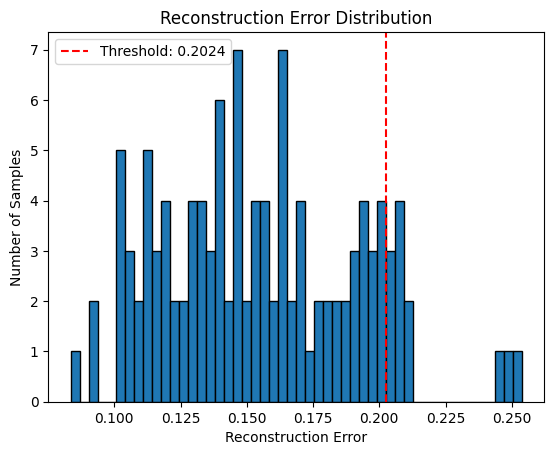

Anomalies detected:
[675   0   0   0 608   0   0   0   0   0   0   0]


In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
from datetime import datetime

# 注册自定义采样函数为可序列化的Keras函数
@tf.keras.utils.register_keras_serializable()
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

kl_loss_weight = 0.1

# 注册 VAE 损失函数
@tf.keras.utils.register_keras_serializable()
def vae_loss(y_true, y_pred):
    decoder_output = y_pred[0]
    z_mean = y_pred[1]
    z_log_var = y_pred[2]
    reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
    reconstruction_loss = reconstruction_loss_fn(y_true, decoder_output)
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss_weight * tf.reduce_mean(kl_loss)

data = pd.read_csv('/home/develop/VAE/data/csv/final_temp.csv')
X = data.values

input_dim = X.shape[1] 

def build_vae(input_dim, latent_dim):
    # 编码器
    input_layer = layers.Input(shape=(input_dim,))
    encoder = layers.Dense(32, activation="relu")(input_layer) # 64
    encoder = layers.Dense(16, activation="relu")(encoder) #32
    z_mean = layers.Dense(latent_dim)(encoder)
    z_log_var = layers.Dense(latent_dim)(encoder)

    # 采样层
    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # 解码器
    decoder = layers.Dense(16, activation="relu")(z) # 32
    decoder = layers.Dense(32, activation="relu")(decoder) # 64
    decoder_output = layers.Dense(input_dim, activation="sigmoid")(decoder)

    vae = Model(input_layer, [decoder_output, z_mean, z_log_var])

    return vae

# 加载测试集数据
test_data = pd.read_csv('/home/develop/VAE/data/csv/test_temp.csv')

# 去除 'origin_index' 列
X_test = test_data.drop(columns=['origin_index']).values
origin_index = test_data['origin_index'].values

# 加载已保存的VAE模型
vae = tf.keras.models.load_model('/home/develop/VAE/Model/vaeModel.keras')

# 使用VAE模型进行预测
X_pred = vae.predict(X_test)[0]  # 获取重构数据

# 计算重构误差
reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)

# 设置阈值为90%百分位
threshold = np.percentile(reconstruction_error, 90)

# 判定异常数据
anomalies = reconstruction_error > threshold

# 可视化重构误差分布
plt.figure()
plt.hist(reconstruction_error, bins=50, edgecolor='k')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Samples")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

# 输出判定为异常的 origin_index
print("Anomalies detected:")
print(origin_index[anomalies])


In [13]:
import pandas as pd

# 替换为你的CSV文件路径
file_path = '/home/develop/VAE/data/csv/test.csv'
# 读取CSV文件
data = pd.read_csv(file_path)

# 输出所有列名
print("列名列表：")
print(data.columns.tolist())


列名列表：
['sensible_heat', 'latent_heat', 'ground_temperature', 'rain_energy', 'outgoing_long_wave_radiation', 'incoming_long_wave_radiation', 'net_long_wave_radiation', 'reflected_short_wave_radiation', 'incoming_short_wave_radiation', 'net_short_wave_radiation', 'parametrized_albedo', 'incoming_short_wave_on_horizontal', 'direct_incoming_short_wave', 'diffuse_incoming_short_wave', 'air_temperature', 'surface_temperature(mod)', 'bottom_temperature', 'relative_humidity', 'wind_velocity', 'wind_velocity_drift', 'wind_direction', 'solid_precipitation_rate', 'snow_height(mod)', 'snow_height(meas)', 'hoar_size', '24h_height_of_new_snow', '3d_sum_of_daily_height_of_new_snow', 'snow_water_equivalent', 'total_amount_of_water', 'rain_rate', 'virtual_lysimeter', 'sublimation_mass', 'evaporated_mass', 'stability_class', 'z_Sdef', 'deformation_rate_stability_index', 'z_Sn38', 'natural_stability_index', 'z_Sk38', 'Sk38_skier_stability_index', 'z_SSI', 'structural_stability_index', 'origin_index']


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


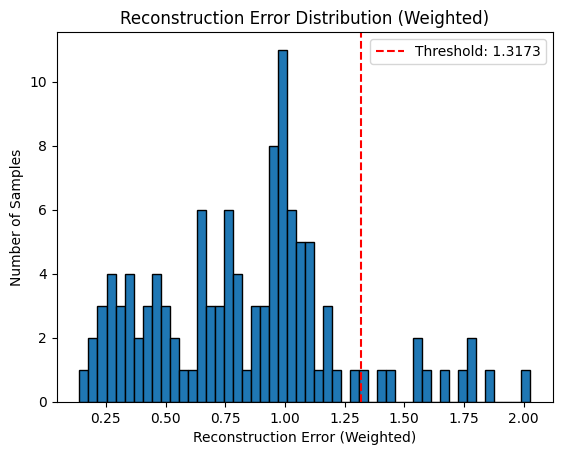

Anomalies detected with temperature weight:
[0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# 注册自定义采样函数为可序列化的Keras函数
@tf.keras.utils.register_keras_serializable()
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

kl_loss_weight = 0.1

# 注册 VAE 损失函数
@tf.keras.utils.register_keras_serializable()
def vae_loss(y_true, y_pred):
    decoder_output = y_pred[0]
    z_mean = y_pred[1]
    z_log_var = y_pred[2]
    reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
    reconstruction_loss = reconstruction_loss_fn(y_true, decoder_output)
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss_weight * tf.reduce_mean(kl_loss)

# 加载训练数据
data = pd.read_csv('/home/develop/VAE/data/csv/final_temp.csv')
X = data.values

# 确定温度相关列及其权重
temperature_columns = [2, 14, 15, 16]  # 温度相关列的索引
temperature_weight = 5  # 温度相关列的权重

# 创建权重矩阵并加权
weights = np.ones(X.shape[1])
weights[temperature_columns] = temperature_weight
X_weighted = X * weights

# 加载测试集数据
test_data = pd.read_csv('/home/develop/VAE/data/csv/test_temp.csv')

# 去除 'origin_index' 列并加权
X_test = test_data.drop(columns=['origin_index']).values
origin_index = test_data['origin_index'].values
X_test_weighted = X_test * weights

# 加载已保存的VAE模型
vae = tf.keras.models.load_model('/home/develop/VAE/Model/vaeModel.keras')

# 使用VAE模型进行预测
X_pred_weighted = vae.predict(X_test_weighted)[0]

# 计算重构误差
reconstruction_error_weighted = np.mean(np.square(X_test_weighted - X_pred_weighted), axis=1)

# 设置阈值为90%百分位
threshold_weighted = np.percentile(reconstruction_error_weighted, 90)

# 判定异常数据
anomalies_weighted = reconstruction_error_weighted > threshold_weighted

# 可视化重构误差分布
plt.figure()
plt.hist(reconstruction_error_weighted, bins=50, edgecolor='k')
plt.axvline(x=threshold_weighted, color='r', linestyle='--', label=f'Threshold: {threshold_weighted:.4f}')
plt.xlabel("Reconstruction Error (Weighted)")
plt.ylabel("Number of Samples")
plt.title("Reconstruction Error Distribution (Weighted)")
plt.legend()
plt.show()

# 输出判定为异常的 origin_index
print("Anomalies detected with temperature weight:")
print(origin_index[anomalies_weighted])
